In [1]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup as bsp
import matplotlib
import matplotlib.pyplot as plt
import sqlite3
import re
from datetime import datetime, timedelta,date
import sys
import time

In [5]:
from selenium import webdriver
from bs4 import BeautifulSoup as bsp

driver = webdriver.Chrome('C:/asi/project/chromedriver_win32 (3)/chromedriver')
url = ('https://www.glowpick.com/beauty/ranking?id=246&level=3')
driver.get(url)
driver.implicitly_wait(3)
scroll()
html = driver.page_source
src = bsp(html,'html.parser')
perfumeranks = src.select('#gp-list > div > section.section-list > ul > li > meta')
print(perfumeranks)

[<meta data-v-54505c1b="" itemprop="position"/>, <meta content="https://www.glowpick.com/product/87685" data-v-54505c1b="" itemprop="url"/>, <meta data-v-54505c1b="" itemprop="position"/>, <meta content="https://www.glowpick.com/product/104688" data-v-54505c1b="" itemprop="url"/>, <meta data-v-54505c1b="" itemprop="position"/>, <meta content="https://www.glowpick.com/product/76613" data-v-54505c1b="" itemprop="url"/>, <meta data-v-54505c1b="" itemprop="position"/>, <meta content="https://www.glowpick.com/product/48517" data-v-54505c1b="" itemprop="url"/>, <meta data-v-54505c1b="" itemprop="position"/>, <meta content="https://www.glowpick.com/product/87393" data-v-54505c1b="" itemprop="url"/>, <meta data-v-54505c1b="" itemprop="position"/>, <meta content="https://www.glowpick.com/product/3271" data-v-54505c1b="" itemprop="url"/>, <meta data-v-54505c1b="" itemprop="position"/>, <meta content="https://www.glowpick.com/product/40821" data-v-54505c1b="" itemprop="url"/>, <meta data-v-54505c

In [110]:
for perfumerank in perfumeranks:
    print(perfumerank)

<meta data-v-54505c1b="" itemprop="position"/>
<meta content="https://www.glowpick.com/product/87685" data-v-54505c1b="" itemprop="url"/>
<meta data-v-54505c1b="" itemprop="position"/>
<meta content="https://www.glowpick.com/product/104688" data-v-54505c1b="" itemprop="url"/>
<meta data-v-54505c1b="" itemprop="position"/>
<meta content="https://www.glowpick.com/product/76613" data-v-54505c1b="" itemprop="url"/>
<meta data-v-54505c1b="" itemprop="position"/>
<meta content="https://www.glowpick.com/product/48517" data-v-54505c1b="" itemprop="url"/>
<meta data-v-54505c1b="" itemprop="position"/>
<meta content="https://www.glowpick.com/product/87393" data-v-54505c1b="" itemprop="url"/>
<meta data-v-54505c1b="" itemprop="position"/>
<meta content="https://www.glowpick.com/product/3271" data-v-54505c1b="" itemprop="url"/>
<meta data-v-54505c1b="" itemprop="position"/>
<meta content="https://www.glowpick.com/product/40821" data-v-54505c1b="" itemprop="url"/>
<meta data-v-54505c1b="" itemprop=

#### ul > li 로 나타내기

In [112]:
perfumeranks = src.select('#gp-list > div > section.section-list > ul > li')
print(perfumeranks)

[<li data-v-54505c1b="" itemprop="itemListElement" itemscope="itemscope" itemtype="http://schema.org/ListItem"><meta data-v-54505c1b="" itemprop="position"/> <meta content="https://www.glowpick.com/product/87685" data-v-54505c1b="" itemprop="url"/> <div class="list-item" data-v-54505c1b=""><div class="product-item product-item--ranking" data-v-54505c1b="" data-v-7a38b84c="" itemscope="itemscope" itemtype="http://schema.org/Product"><meta content="https://www.glowpick.com/product/87685" data-v-7a38b84c="" itemprop="url"/> <div class="product-item__info" data-v-7a38b84c=""><div class="product-item__info__image image image--ranking" data-v-7a38b84c=""><figure class="image__figure" data-v-7a38b84c=""><div class="product-image-wrapper" data-v-43fb444d="" data-v-7a38b84c="" itemprop="image"><div aria-label="끌로에 (CHLOE)|끌로에 오 드 퍼퓸" class="image product-image__detail image--loaded" data-v-43fb444d="" data-v-e42b4b0a="" role="img" style="width: 100%; height: 100%;"><meta content="https://dn5hza

##### meta 인덱스로 url 뽑아냄(meta > content)

In [132]:
for perfumerank in perfumeranks:
    urls = perfumerank.select('meta')[1]
    conts = urls['content']
    print(conts)
    print('#'*100)
    for cont in conts:
        driver.get(cont)
        driver.implicitly_wait(3)
        html = driver.page_source
        src = bsp(html,'html.parser')
        for i in range(len(cont)):
            brand_name = src.select('p.product-main-info__brand_name')[i]
            print(brand_name)
            #name = src.select('span.product-main-info__product_name__text')[0]

https://www.glowpick.com/product/87685
####################################################################################################
https://www.glowpick.com/product/104688
####################################################################################################
https://www.glowpick.com/product/76613
####################################################################################################
https://www.glowpick.com/product/48517
####################################################################################################
https://www.glowpick.com/product/87393
####################################################################################################
https://www.glowpick.com/product/3271
####################################################################################################
https://www.glowpick.com/product/40821
####################################################################################################
https://www.glowpick

In [152]:
for perfumerank in perfumeranks:
    urls = perfumerank.select('meta')[1]
    conts = urls['content']
    print(conts)
    print('#'*100)
    #driver.get(conts)
    #driver.implicitly_wait(3)
    #headers = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.90 Safari/537.36'}  
    #response = requests.get(conts,headers=headers)
    html = driver.page_source #(셀레니움 할 때, 페이지 소스 긁는것)
    src = bsp(html,'html.parser')
    print(src)
    brand_name = src.find(attrs={'class':'product-main-info__brand_name'})#.text
    print(brand_name)
    
driver = webdriver.Chrome('C:/asi/project/chromedriver_win32 (3)/chromedriver')
url = ('https://www.glowpick.com/product/87685')
driver.get(url)
driver.implicitly_wait(3)
# headers = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.90 Safari/537.36'}  
# response = requests.get(url,headers=headers)
html = driver.page_source
src = bsp(html,'html.parser')
src

https://www.glowpick.com/product/87685
####################################################################################################
<!DOCTYPE doctype html>

<!--[if IE 9]>
<html lang="ko" class="lt-ie9 ie9"><![endif]-->
<!--[if (gt IE 9)|!(IE)]><!-->
<html lang="ko"><!--<![endif]-->
<head>
<title>ê¸ë¡ì°í½ - ì¸ì ëª¨ë  íì¥í ë¦¬ë·°</title><meta charset="utf-8" data-n-head="1"/><meta content="width=device-width,initial-scale=1,maximum-scale=5,minimum-scale=1" data-n-head="1" name="viewport"/><meta content="ie=edge" data-n-head="1" http-equiv="x-ua-compatible"/><meta content="Mon, 06 Jan 1990 00:00:01 GMT" data-n-head="1" http-equiv="Expires"/><meta content="-1" data-n-head="1" http-equiv="Expires"/><meta content="no-cache" data-n-head="1" http-equiv="Pragma"/><meta content="no-cache" data-n-head="1" http-equiv="Cache-Control"/><meta content="ì§ì§ ìë¹ìë¤ì íê°ë¡ ë§ë¤ì´ì§ ì§ì§ ë·°í° ë­í¹, ê¸ë¡ì°í½" data-hid="description" data-n-head="1" name="de

<!DOCTYPE doctype html>

<!--[if IE 9]>
<html lang="ko" class="lt-ie9 ie9"><![endif]-->
<!--[if (gt IE 9)|!(IE)]><!-->
<html lang="ko"><!--<![endif]-->
<head>
<title>ê¸ë¡ì°í½ - ì¸ì ëª¨ë  íì¥í ë¦¬ë·°</title><meta charset="utf-8" data-n-head="1"/><meta content="width=device-width,initial-scale=1,maximum-scale=5,minimum-scale=1" data-n-head="1" name="viewport"/><meta content="ie=edge" data-n-head="1" http-equiv="x-ua-compatible"/><meta content="Mon, 06 Jan 1990 00:00:01 GMT" data-n-head="1" http-equiv="Expires"/><meta content="-1" data-n-head="1" http-equiv="Expires"/><meta content="no-cache" data-n-head="1" http-equiv="Pragma"/><meta content="no-cache" data-n-head="1" http-equiv="Cache-Control"/><meta content="ì§ì§ ìë¹ìë¤ì íê°ë¡ ë§ë¤ì´ì§ ì§ì§ ë·°í° ë­í¹, ê¸ë¡ì°í½" data-hid="description" data-n-head="1" name="description"/><meta content="https://d2sogys4gzaamu.cloudfront.net/prod/common/og_logo_new.png" data-hid="og:image" data-n-head="1" property="

<!DOCTYPE doctype html>

<!--[if IE 9]>
<html lang="ko" class="lt-ie9 ie9"><![endif]-->
<!--[if (gt IE 9)|!(IE)]><!-->
<html lang="ko"><!--<![endif]-->
<head>
<title>ê¸ë¡ì°í½ - ì¸ì ëª¨ë  íì¥í ë¦¬ë·°</title><meta charset="utf-8" data-n-head="1"/><meta content="width=device-width,initial-scale=1,maximum-scale=5,minimum-scale=1" data-n-head="1" name="viewport"/><meta content="ie=edge" data-n-head="1" http-equiv="x-ua-compatible"/><meta content="Mon, 06 Jan 1990 00:00:01 GMT" data-n-head="1" http-equiv="Expires"/><meta content="-1" data-n-head="1" http-equiv="Expires"/><meta content="no-cache" data-n-head="1" http-equiv="Pragma"/><meta content="no-cache" data-n-head="1" http-equiv="Cache-Control"/><meta content="ì§ì§ ìë¹ìë¤ì íê°ë¡ ë§ë¤ì´ì§ ì§ì§ ë·°í° ë­í¹, ê¸ë¡ì°í½" data-hid="description" data-n-head="1" name="description"/><meta content="https://d2sogys4gzaamu.cloudfront.net/prod/common/og_logo_new.png" data-hid="og:image" data-n-head="1" property="

<!DOCTYPE doctype html>

<!--[if IE 9]>
<html lang="ko" class="lt-ie9 ie9"><![endif]-->
<!--[if (gt IE 9)|!(IE)]><!-->
<html lang="ko"><!--<![endif]-->
<head>
<title>ê¸ë¡ì°í½ - ì¸ì ëª¨ë  íì¥í ë¦¬ë·°</title><meta charset="utf-8" data-n-head="1"/><meta content="width=device-width,initial-scale=1,maximum-scale=5,minimum-scale=1" data-n-head="1" name="viewport"/><meta content="ie=edge" data-n-head="1" http-equiv="x-ua-compatible"/><meta content="Mon, 06 Jan 1990 00:00:01 GMT" data-n-head="1" http-equiv="Expires"/><meta content="-1" data-n-head="1" http-equiv="Expires"/><meta content="no-cache" data-n-head="1" http-equiv="Pragma"/><meta content="no-cache" data-n-head="1" http-equiv="Cache-Control"/><meta content="ì§ì§ ìë¹ìë¤ì íê°ë¡ ë§ë¤ì´ì§ ì§ì§ ë·°í° ë­í¹, ê¸ë¡ì°í½" data-hid="description" data-n-head="1" name="description"/><meta content="https://d2sogys4gzaamu.cloudfront.net/prod/common/og_logo_new.png" data-hid="og:image" data-n-head="1" property="

<!DOCTYPE doctype html>

<!--[if IE 9]>
<html lang="ko" class="lt-ie9 ie9"><![endif]-->
<!--[if (gt IE 9)|!(IE)]><!-->
<html lang="ko"><!--<![endif]-->
<head>
<title>ê¸ë¡ì°í½ - ì¸ì ëª¨ë  íì¥í ë¦¬ë·°</title><meta charset="utf-8" data-n-head="1"/><meta content="width=device-width,initial-scale=1,maximum-scale=5,minimum-scale=1" data-n-head="1" name="viewport"/><meta content="ie=edge" data-n-head="1" http-equiv="x-ua-compatible"/><meta content="Mon, 06 Jan 1990 00:00:01 GMT" data-n-head="1" http-equiv="Expires"/><meta content="-1" data-n-head="1" http-equiv="Expires"/><meta content="no-cache" data-n-head="1" http-equiv="Pragma"/><meta content="no-cache" data-n-head="1" http-equiv="Cache-Control"/><meta content="ì§ì§ ìë¹ìë¤ì íê°ë¡ ë§ë¤ì´ì§ ì§ì§ ë·°í° ë­í¹, ê¸ë¡ì°í½" data-hid="description" data-n-head="1" name="description"/><meta content="https://d2sogys4gzaamu.cloudfront.net/prod/common/og_logo_new.png" data-hid="og:image" data-n-head="1" property="

<!DOCTYPE doctype html>

<!--[if IE 9]>
<html lang="ko" class="lt-ie9 ie9"><![endif]-->
<!--[if (gt IE 9)|!(IE)]><!-->
<html lang="ko"><!--<![endif]-->
<head>
<title>ê¸ë¡ì°í½ - ì¸ì ëª¨ë  íì¥í ë¦¬ë·°</title><meta charset="utf-8" data-n-head="1"/><meta content="width=device-width,initial-scale=1,maximum-scale=5,minimum-scale=1" data-n-head="1" name="viewport"/><meta content="ie=edge" data-n-head="1" http-equiv="x-ua-compatible"/><meta content="Mon, 06 Jan 1990 00:00:01 GMT" data-n-head="1" http-equiv="Expires"/><meta content="-1" data-n-head="1" http-equiv="Expires"/><meta content="no-cache" data-n-head="1" http-equiv="Pragma"/><meta content="no-cache" data-n-head="1" http-equiv="Cache-Control"/><meta content="ì§ì§ ìë¹ìë¤ì íê°ë¡ ë§ë¤ì´ì§ ì§ì§ ë·°í° ë­í¹, ê¸ë¡ì°í½" data-hid="description" data-n-head="1" name="description"/><meta content="https://d2sogys4gzaamu.cloudfront.net/prod/common/og_logo_new.png" data-hid="og:image" data-n-head="1" property="

<!DOCTYPE doctype html>

<!--[if IE 9]>
<html lang="ko" class="lt-ie9 ie9"><![endif]-->
<!--[if (gt IE 9)|!(IE)]><!-->
<html lang="ko"><!--<![endif]-->
<head>
<title>ê¸ë¡ì°í½ - ì¸ì ëª¨ë  íì¥í ë¦¬ë·°</title><meta charset="utf-8" data-n-head="1"/><meta content="width=device-width,initial-scale=1,maximum-scale=5,minimum-scale=1" data-n-head="1" name="viewport"/><meta content="ie=edge" data-n-head="1" http-equiv="x-ua-compatible"/><meta content="Mon, 06 Jan 1990 00:00:01 GMT" data-n-head="1" http-equiv="Expires"/><meta content="-1" data-n-head="1" http-equiv="Expires"/><meta content="no-cache" data-n-head="1" http-equiv="Pragma"/><meta content="no-cache" data-n-head="1" http-equiv="Cache-Control"/><meta content="ì§ì§ ìë¹ìë¤ì íê°ë¡ ë§ë¤ì´ì§ ì§ì§ ë·°í° ë­í¹, ê¸ë¡ì°í½" data-hid="description" data-n-head="1" name="description"/><meta content="https://d2sogys4gzaamu.cloudfront.net/prod/common/og_logo_new.png" data-hid="og:image" data-n-head="1" property="

<!DOCTYPE doctype html>

<!--[if IE 9]>
<html lang="ko" class="lt-ie9 ie9"><![endif]-->
<!--[if (gt IE 9)|!(IE)]><!-->
<html lang="ko"><!--<![endif]-->
<head>
<title>ê¸ë¡ì°í½ - ì¸ì ëª¨ë  íì¥í ë¦¬ë·°</title><meta charset="utf-8" data-n-head="1"/><meta content="width=device-width,initial-scale=1,maximum-scale=5,minimum-scale=1" data-n-head="1" name="viewport"/><meta content="ie=edge" data-n-head="1" http-equiv="x-ua-compatible"/><meta content="Mon, 06 Jan 1990 00:00:01 GMT" data-n-head="1" http-equiv="Expires"/><meta content="-1" data-n-head="1" http-equiv="Expires"/><meta content="no-cache" data-n-head="1" http-equiv="Pragma"/><meta content="no-cache" data-n-head="1" http-equiv="Cache-Control"/><meta content="ì§ì§ ìë¹ìë¤ì íê°ë¡ ë§ë¤ì´ì§ ì§ì§ ë·°í° ë­í¹, ê¸ë¡ì°í½" data-hid="description" data-n-head="1" name="description"/><meta content="https://d2sogys4gzaamu.cloudfront.net/prod/common/og_logo_new.png" data-hid="og:image" data-n-head="1" property="

<!DOCTYPE doctype html>

<!--[if IE 9]>
<html lang="ko" class="lt-ie9 ie9"><![endif]-->
<!--[if (gt IE 9)|!(IE)]><!-->
<html lang="ko"><!--<![endif]-->
<head>
<title>ê¸ë¡ì°í½ - ì¸ì ëª¨ë  íì¥í ë¦¬ë·°</title><meta charset="utf-8" data-n-head="1"/><meta content="width=device-width,initial-scale=1,maximum-scale=5,minimum-scale=1" data-n-head="1" name="viewport"/><meta content="ie=edge" data-n-head="1" http-equiv="x-ua-compatible"/><meta content="Mon, 06 Jan 1990 00:00:01 GMT" data-n-head="1" http-equiv="Expires"/><meta content="-1" data-n-head="1" http-equiv="Expires"/><meta content="no-cache" data-n-head="1" http-equiv="Pragma"/><meta content="no-cache" data-n-head="1" http-equiv="Cache-Control"/><meta content="ì§ì§ ìë¹ìë¤ì íê°ë¡ ë§ë¤ì´ì§ ì§ì§ ë·°í° ë­í¹, ê¸ë¡ì°í½" data-hid="description" data-n-head="1" name="description"/><meta content="https://d2sogys4gzaamu.cloudfront.net/prod/common/og_logo_new.png" data-hid="og:image" data-n-head="1" property="

<!DOCTYPE doctype html>

<!--[if IE 9]>
<html lang="ko" class="lt-ie9 ie9"><![endif]-->
<!--[if (gt IE 9)|!(IE)]><!-->
<html lang="ko"><!--<![endif]-->
<head>
<title>ê¸ë¡ì°í½ - ì¸ì ëª¨ë  íì¥í ë¦¬ë·°</title><meta charset="utf-8" data-n-head="1"/><meta content="width=device-width,initial-scale=1,maximum-scale=5,minimum-scale=1" data-n-head="1" name="viewport"/><meta content="ie=edge" data-n-head="1" http-equiv="x-ua-compatible"/><meta content="Mon, 06 Jan 1990 00:00:01 GMT" data-n-head="1" http-equiv="Expires"/><meta content="-1" data-n-head="1" http-equiv="Expires"/><meta content="no-cache" data-n-head="1" http-equiv="Pragma"/><meta content="no-cache" data-n-head="1" http-equiv="Cache-Control"/><meta content="ì§ì§ ìë¹ìë¤ì íê°ë¡ ë§ë¤ì´ì§ ì§ì§ ë·°í° ë­í¹, ê¸ë¡ì°í½" data-hid="description" data-n-head="1" name="description"/><meta content="https://d2sogys4gzaamu.cloudfront.net/prod/common/og_logo_new.png" data-hid="og:image" data-n-head="1" property="

In [128]:
for url in urls :   
    driver.get(url)
    #driver.implicitly_wait(3)
    html = driver.page_source
    src = bsp(html,'html.parser')
    for i in range(len(url)):
        brand_name = src.select('p.product-main-info__brand_name')[i]
        print(brand_name)
        name = src.select('span.product-main-info__product_name__text')[0]

In [ ]:
##############################################################################################

In [204]:
from selenium import webdriver
from bs4 import BeautifulSoup as bsp

driver = webdriver.Chrome('C:/asi/project/chromedriver_win32 (3)/chromedriver')
url = ('https://www.glowpick.com/product/87685')
driver.get(url)
driver.implicitly_wait(3)
#headers = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.90 Safari/537.36'}  
#response = requests.get(url,headers=headers)
html = driver.page_source
src = bsp(html,'html.parser')

<html class="wf-inactive" lang="ko"><!--<![endif]--><head><style type="text/css">.swal-icon--error{border-color:#f27474;-webkit-animation:animateErrorIcon .5s;animation:animateErrorIcon .5s}.swal-icon--error__x-mark{position:relative;display:block;-webkit-animation:animateXMark .5s;animation:animateXMark .5s}.swal-icon--error__line{position:absolute;height:5px;width:47px;background-color:#f27474;display:block;top:37px;border-radius:2px}.swal-icon--error__line--left{-webkit-transform:rotate(45deg);transform:rotate(45deg);left:17px}.swal-icon--error__line--right{-webkit-transform:rotate(-45deg);transform:rotate(-45deg);right:16px}@-webkit-keyframes animateErrorIcon{0%{-webkit-transform:rotateX(100deg);transform:rotateX(100deg);opacity:0}to{-webkit-transform:rotateX(0deg);transform:rotateX(0deg);opacity:1}}@keyframes animateErrorIcon{0%{-webkit-transform:rotateX(100deg);transform:rotateX(100deg);opacity:0}to{-webkit-transform:rotateX(0deg);transform:rotateX(0deg);opacity:1}}@-webkit-keyfr
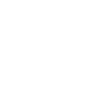
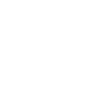

In [155]:
driver = webdriver.Chrome('C:/asi/project/chromedriver_win32 (3)/chromedriver')
url = ('https://www.glowpick.com/product/87685')
driver.get(url)
driver.implicitly_wait(3)
# headers = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.90 Safari/537.36'}  
# response = requests.get(url,headers=headers)
html = driver.page_source
src = bsp(html,'html.parser')
src

In [90]:
for perfumerank in perfumeranks :
    if(len(perfumerank)>0):
        for i in range(len(perfumerank)) :
            brand_name = perfumerank.select('p.details__labels__brand')[i].text.strip()
            name = perfumerank.select('p.details__labels__name')[i].text.strip()
            score = perfumerank.select('span.details__score__rating')[i].text.strip()
            print(brand_name,name,score,url)

In [ ]:
처음에 셀레니움으로 스크롤 다 내려서 top 100 보이게 한 후
top 100의 url 을 뷰티숩으로 하나씩 도출
각 url에 들어가서 (셀레니움으로 들어가서) 그 안에 내용들을 긁는다.
리뷰를 셀레니움으로 스크롤 다 내림
뷰티풀숩으로 내용 긁기

In [208]:
driver = webdriver.Chrome('C:/asi/project/chromedriver_win32 (3)/chromedriver')
url = 'https://www.glowpick.com/beauty/ranking?id=246&level=3'
driver.get(url)
scroll()
src = bsp(driver.page_source,'html.parser')


WebDriverException: Message: chrome not reachable
  (Session info: chrome=89.0.4389.90)


In [194]:
# driver = webdriver.Chrome('C:/asi/project/chromedriver_win32 (3)/chromedriver')
# url = 'https://www.glowpick.com/beauty/ranking?id=246&level=3'
# driver.get(url)
# time.sleep(5)
# driver.execute_script("window.scrollTo(0,document.body.scrollHeight);")

In [4]:
from selenium.webdriver.common.keys import Keys

def scroll():
    body = driver.find_element_by_css_selector('body')
    for i in range(20):
        body.send_keys(Keys.PAGE_DOWN)
        time.sleep(0.5)